In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# The code below have been referenced and is not mine

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import datasets
from datasets import load_dataset

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
picture_size = 48
folder_path = "/content/drive/MyDrive/Kaggle_face_Emotion/images/"

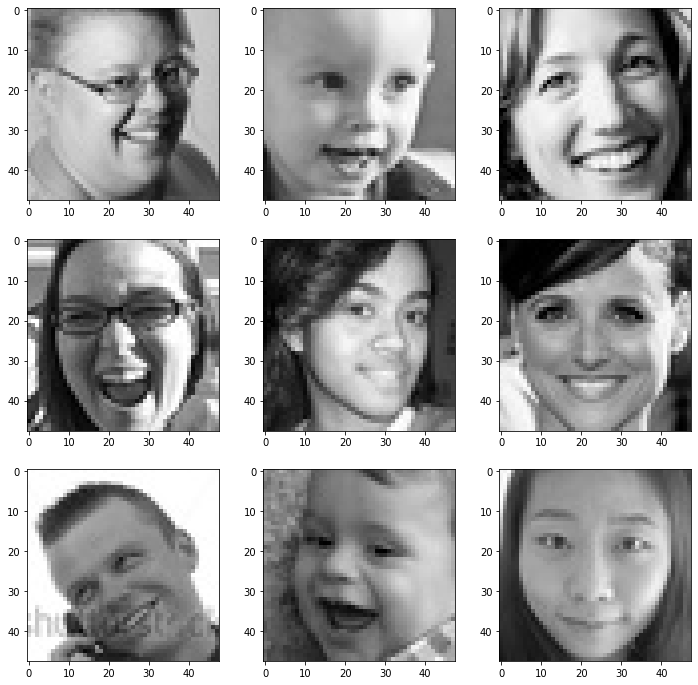

In [ ]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

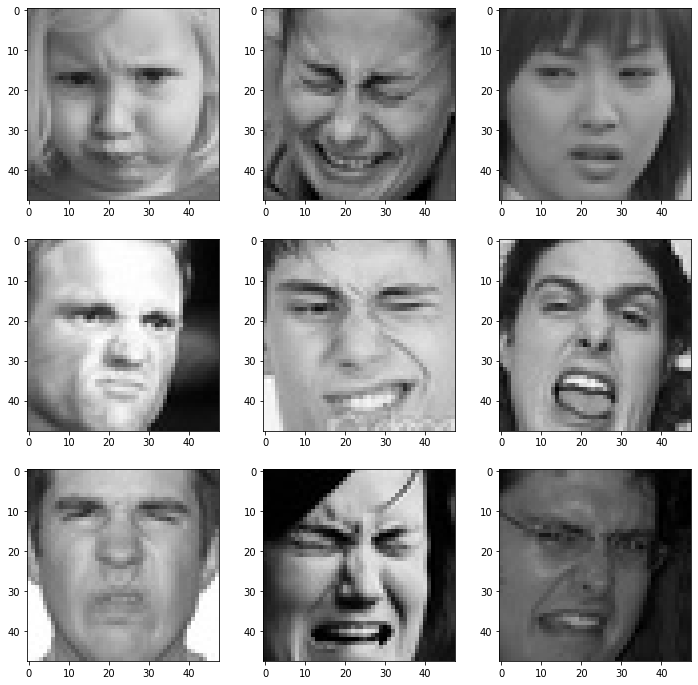

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

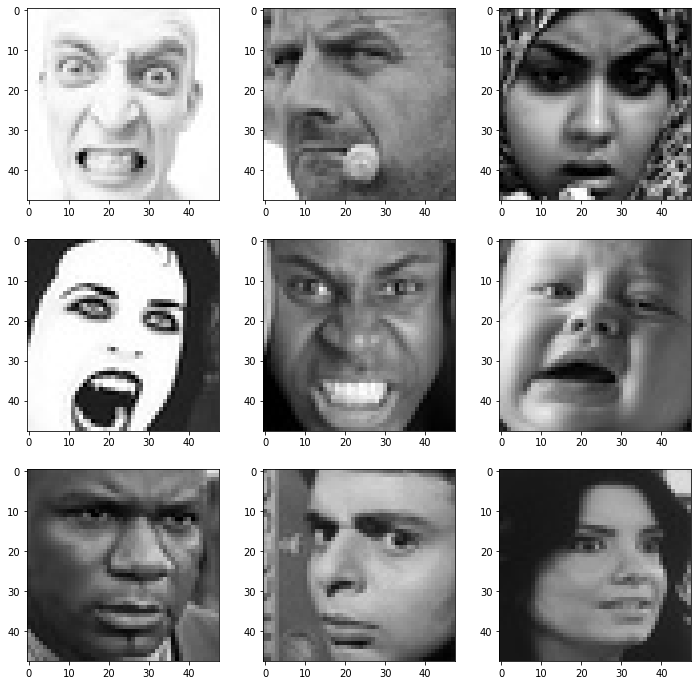

In [16]:
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

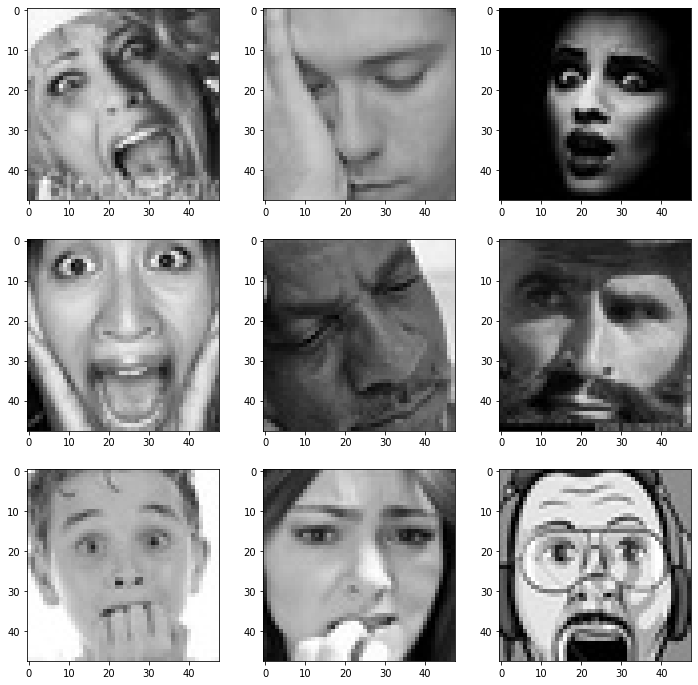

In [17]:
expression = 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

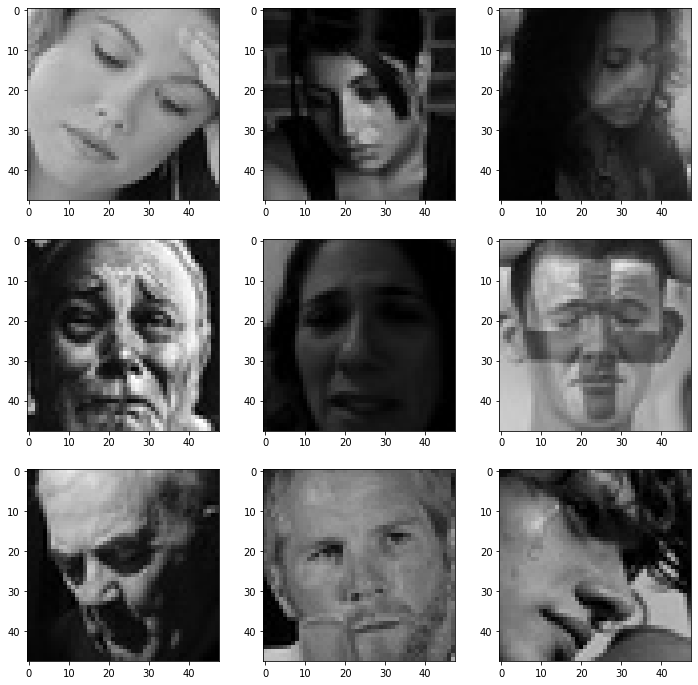

In [18]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

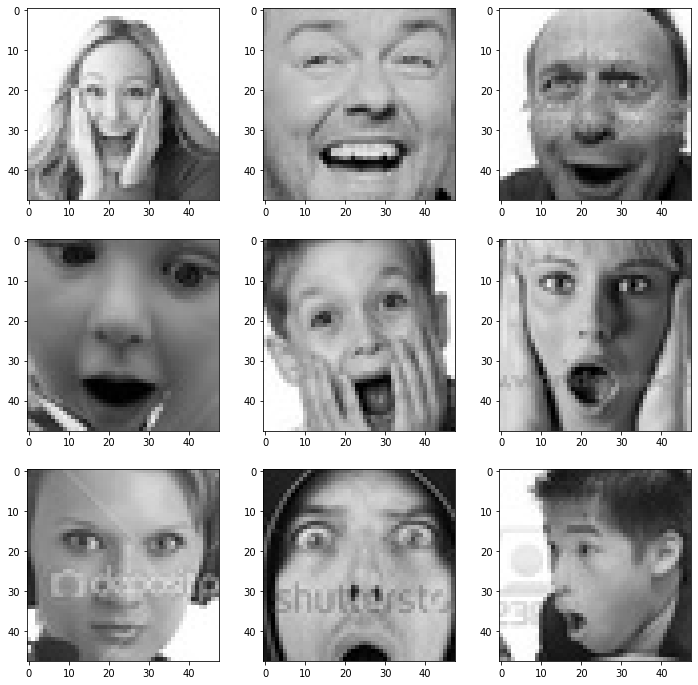

In [19]:
expression = 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

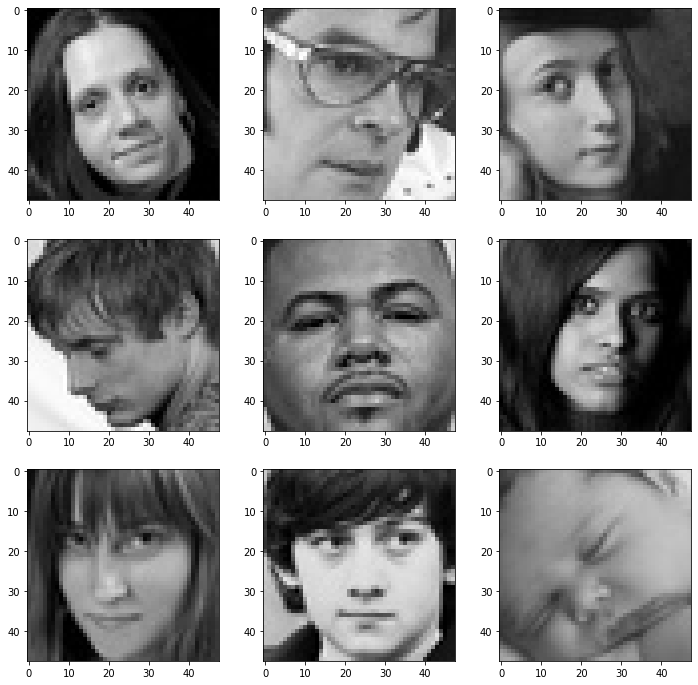

In [20]:
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [ ]:
batch_size=128
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_val=ImageDataGenerator(rescale=1./255)

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

In [ ]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 7

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
img, label = train_set.__next__()

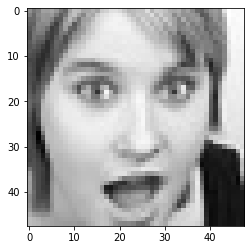

In [ ]:
import random
i = random.randint(0, (img.shape[0]-1))
image = img[i]
# labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
# plt.title(labl)
plt.show()

In [14]:
train_path = '/content/contentdrive/MyDrive/Kaggle_face_Emotion/images/train'
test_path = '/content/contentdrive/MyDrive/Kaggle_face_Emotion/images/test'

# num_train_imgs = 0
# for root, dirs, files in os.walk(train_path):
#     num_train_imgs += len(files)
    
# num_test_imgs = 0
# for root, dirs, files in os.walk(test_path):
#     num_test_imgs += len(files)

epochs =7

history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                    )

model.save('emotion_detection_model_7epochs.h5')

Epoch 1/7
225/225 [==============================] - ETA: 0s - loss: 1.7979 - accuracy: 0.3092 

225/225 [==============================] - 6222s 28s/step - loss: 1.7979 - accuracy: 0.3092 - val_loss: 2.0689 - val_accuracy: 0.2602 - lr: 0.0010
Epoch 2/7
225/225 [==============================] - ETA: 0s - loss: 1.4434 - accuracy: 0.4432

225/225 [==============================] - 1747s 8s/step - loss: 1.4434 - accuracy: 0.4432 - val_loss: 1.8650 - val_accuracy: 0.2949 - lr: 0.0010
Epoch 3/7
225/225 [==============================] - ETA: 0s - loss: 1.2791 - accuracy: 0.5100

225/225 [==============================] - 1724s 8s/step - loss: 1.2791 - accuracy: 0.5100 - val_loss: 1.2600 - val_accuracy: 0.5081 - lr: 0.0010
Epoch 4/7
225/225 [==============================] - ETA: 0s - loss: 1.1928 - accuracy: 0.5459

225/225 [==============================] - 1775s 8s/step - loss: 1.1928 - accuracy: 0.5459 - val_loss: 1.3421 - val_accuracy: 0.4764 - lr: 0.0010
Epoch 5/7
225/225 [==============================] - ETA: 0s - loss: 1.1295 - accuracy: 0.5667

225/225 [==============================] - 1762s 8s/step - loss: 1.1295 - accuracy: 0.5667 - val_loss: 1.2582 - val_accuracy: 0.5199 - lr: 0.0010
Epoch 6/7
225/225 [==============================] - ETA: 0s - loss: 1.0727 - accuracy: 0.5908

225/225 [==============================] - 1762s 8s/step - loss: 1.0727 - accuracy: 0.5908 - val_loss: 1.2984 - val_accuracy: 0.4854 - lr: 0.0010
Epoch 7/7
225/225 [==============================] - ETA: 0s - loss: 1.0314 - accuracy: 0.6134

225/225 [==============================] - 1744s 8s/step - loss: 1.0314 - accuracy: 0.6134 - val_loss: 1.1321 - val_accuracy: 0.5712 - lr: 0.0010


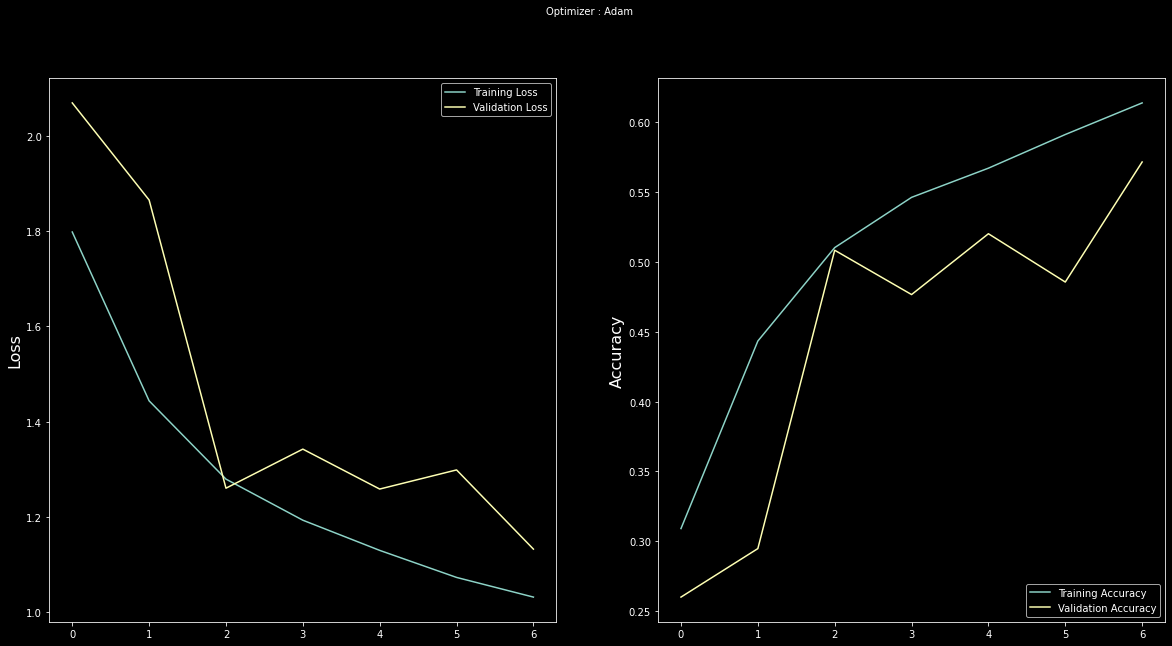

In [21]:


plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()



# End of Referenced code

#**Contribution**

---

CreateD ALTERNATE MODEL USING ANN TO CHECK THE ACCURACY ACROSS BOTH THE MODEL, This code was done by me while using official documentation as reference

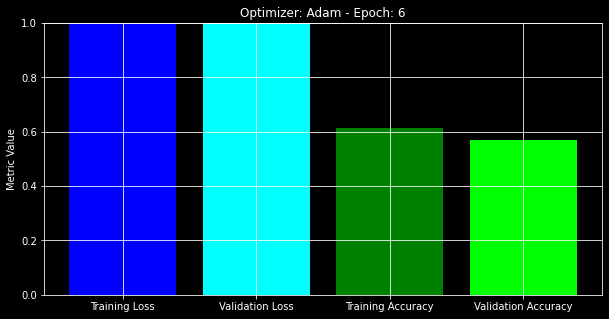

In [56]:

# define the epoch to plot
epoch = 6

# extract the training and validation metrics for the specified epoch
train_loss = history.history['loss'][epoch]
val_loss = history.history['val_loss'][epoch]
train_acc = history.history['accuracy'][epoch]
val_acc = history.history['val_accuracy'][epoch]

# create a bar chart of the metrics
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
metrics = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
values = [train_loss, val_loss, train_acc, val_acc]
colors = ['blue', 'cyan', 'green', 'lime']
ax.bar(metrics, values, color=colors)

# add labels and titles
ax.set_title('Optimizer: Adam - Epoch: {}'.format(epoch))
ax.set_ylabel('Metric Value')
ax.set_ylim([0, 1])
ax.grid(True)

# display the plot
plt.show()


In [46]:
model = models.Sequential([
        layers.Flatten(input_shape=(48,48,1)),
        layers.Dense(4000, activation='relu'),
        layers.Dense(7, activation='softmax')    
    ])

In [77]:
epochs = 7

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = SGD(learning_rate=0.001),
             metrics=['accuracy'])

In [34]:
test_data = {}
X_valid = datasets.load_dataset('/content/drive/MyDrive/Kaggle_face_Emotion/images/validation')
test_data.shape

Resolving data files:   0%|          | 0/7076 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/validation-4992491277a51547/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

{'train': (7076, 2)}

In [35]:
image_object = test_data['train']

In [79]:

dataset = image_object.map(lambda x: {'image': x['image'], 'label': x['label']})

img = np.array([example['image'] for example in dataset])
labels = np.array([example['label'] for example in dataset])

img = np.array([np.array(image) for image in img])
labels = np.array(labels)

model.fit(img,labels,  epochs=7, batch_size=128)

accuracy = model.evaluate(img, labels)



<ipython-input-79-0b1b94affb8b>:5: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  img = np.array([example['image'] for example in train_dataset])
<ipython-input-79-0b1b94affb8b>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img = np.array([example['image'] for example in train_dataset])


Epoch 1/7
56/56 [==============================] - 7s 124ms/step - loss: 1.8075 - accuracy: 0.2585
Epoch 2/7
56/56 [==============================] - 9s 163ms/step - loss: 1.8075 - accuracy: 0.2585
Epoch 3/7
56/56 [==============================] - 7s 124ms/step - loss: 1.8075 - accuracy: 0.2585
Epoch 4/7
56/56 [==============================] - 9s 166ms/step - loss: 1.8075 - accuracy: 0.2585
Epoch 5/7
56/56 [==============================] - 7s 124ms/step - loss: 1.8075 - accuracy: 0.2585
Epoch 6/7
56/56 [==============================] - 9s 166ms/step - loss: 1.8075 - accuracy: 0.2585
Epoch 7/7
222/222 [==============================] - 8s 37ms/step - loss: 1.8074 - accuracy: 0.2585


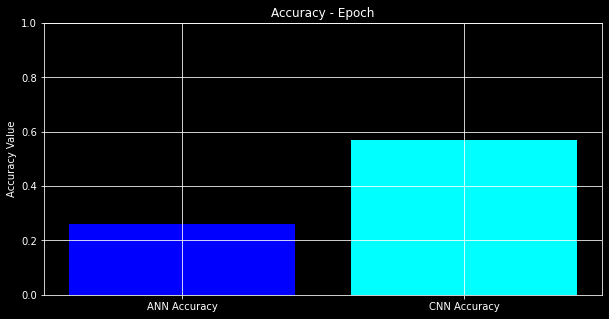

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# define the epoch to plot
ANN_epoch = 1
CNN_epoch = 6

# extract the training and validation accuracy values for the specified epoch
train_acc = accuracy[ANN_epoch]
val_acc = history.history['val_accuracy'][CNN_epoch]

# create a bar chart of the accuracy values
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
metrics = ['ANN Accuracy', 'CNN Accuracy']
values = [ train_acc, val_acc,]
colors = ['blue', 'cyan']
ax.bar(metrics, values, color=colors)

# add labels and titles
ax.set_title('Accuracy - Epoch')
ax.set_ylabel('Accuracy Value')
ax.set_ylim([0, 1])
ax.grid(True)

# display the plot
plt.show()


#**Refrences**

https://www.geeksforgeeks.org/artificial-neural-network-in-tensorflow/

https://github.com/Chando0185/face_recognition_system

https://github.com/komalck/FACIAL-EMOTION-RECOGNITION/blob/master/Facial_emotion_recognition.ipynb

https://github.com/tulseebisen/DL_projects/blob/main/Face_emotion_recognition/facial-emotion-recognition.ipynb

https://victorzhou.com/blog/keras-cnn-tutorial/

https://www.tensorflow.org/tutorials/images/cnn